<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/04RetiNeurali/02ReteConvoluzionale/mnist_keras_conv02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST in Keras Convoluzionale
## Esercizio 2
**Author: Cristiano Casadei**

In [1]:
from random import randint

import matplotlib.pyplot as plt
import numpy
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.python.keras.utils import np_utils

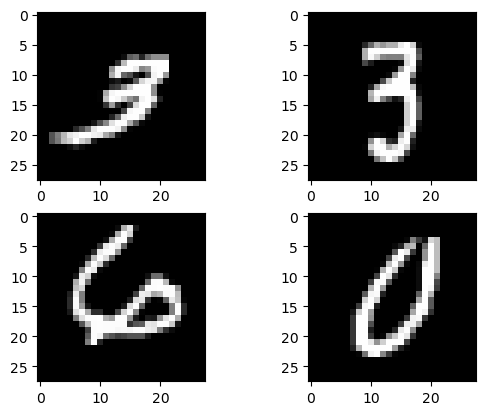

In [2]:
# ottengo il dataset MNIST già suddiviso in dataset X e Y, di addestramento e di test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# visualizzo 4 cifre random
for i in range(4):
    plt.subplot(2, 2, (i + 1))
    # in 'shape[0]' è contenuto il numero di esempi del dataset (in questo caso di addestramento)
    plt.imshow(X_train[randint(0, X_train.shape[0])], cmap=plt.get_cmap('gray'))

In [3]:
# imposto un seed random in modo da ottenere risultati replicabili, d'ora in avanti
numpy.random.seed(1234)

# modifico le matrici di pixel in modo da ottenere una matrice di pixels monocromatici
# usando Tensorflow, il canale del colore è l'ultimo dopo le dimensioni (ncifre, dimy, dimx, ncanalicolore)
# con altri backend (ad esempio Theano) il canale va prima delle dimensioni (ncifre, ncanalicolore, dimy, dimx)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalizzo i valori dei pixel portandoli dal range intero 0-255 al range in virgola mobile 0.0-1.0
# visto che sono array numpy, è sufficiente eseguire l'operazione direttamente sull'array
X_train = X_train / 255
X_test = X_test / 255

# modifico gli array dei risultati ("ground truth") in modo siano in formato 'one hot encode'
# quindi i valori interi corrispondenti alla classe della cifra (0, 1, 2, ..., 9) vengono
# codificati in stringhe posizionali di 0 ed 1
# esempi:
#   0 --> 1,0,0,0,0,0,0,0,0,0
#   1 --> 0,1,0,0,0,0,0,0,0,0
#   2 --> 0,0,1,0,0,0,0,0,0,0
#  ....
#   9 --> 0,0,0,0,0,0,0,0,0,1
# in questo modo è più semplice ottenere un risultato significativo dalla rete neurale, in quanto
# ogni cifra posizionale corrisponderà ad un neurone dello strato di output che si attiverà o meno
# a seconda del risultato della classificazione della rete neurale
# in 'shape[0]' continuerà ad essere contenuto il numero di cifre del dataset
# in 'shape[1]' ci sarà invece il numero di cifre posizionali, corrispondente al numero di classi possibili
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classi = y_train.shape[1]

In [4]:
# definisco un modello di rete neurale convoluzionale
# come dimensione del layer di ingresso uso quelle del train set (esclusa la dimensione iniziale del numero di cifre del dataset)
input_layer = Input(shape=X_train.shape[1:], name="input_layer")
inner_layer = Conv2D(30, (5, 5), activation="relu", name="conv_layer_1")(input_layer)
inner_layer = MaxPooling2D(pool_size=(2, 2), name="maxpool_layer_1")(inner_layer)
inner_layer = Conv2D(15, (3, 3), activation="relu", name="conv_layer_2")(inner_layer)
inner_layer = MaxPooling2D(pool_size=(2, 2), name="maxpool_layer_2")(inner_layer)
inner_layer = Dropout(rate=0.2, name="drop_layer")(inner_layer)
inner_layer = Flatten(name="flatten_layer")(inner_layer)
inner_layer = Dense(128, activation="relu", name="dense_layer_1")(inner_layer)
inner_layer = Dense(50, activation="relu", name="dense_layer_2")(inner_layer)
output_layer = Dense(num_classi, activation="softmax", name="output_layer")(inner_layer)

model = Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

2022-12-19 09:06:07.167379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:06:07.172508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:06:07.172657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:06:07.173347: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_layer_1 (Conv2D)        (None, 24, 24, 30)        780       
_________________________________________________________________
maxpool_layer_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 10, 10, 15)        4065      
_________________________________________________________________
maxpool_layer_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
drop_layer (Dropout)         (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 375)               0     

node zero
2022-12-19 09:06:07.174439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:06:07.174551: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:06:07.889828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:06:07.890003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:06:07.890124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

In [5]:
# compilo il modello indicando che tipo di loss_function devo utilizzare,
# il tipo di ottimizzatore e le metriche che voglio vengano calcolate
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# addestro il modello
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=256, verbose=1)

2022-12-19 09:06:14.693605: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-12-19 09:06:15.985486: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101
2022-12-19 09:06:16.634381: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-19 09:06:16.634981: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-19 09:06:16.635009: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-12-19 09:06:16.635447: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-19 09:06:16.635519: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


235/235 [==============================] - 5s 8ms/step - loss: 0.4281 - accuracy: 0.8686 - val_loss: 0.0839 - val_accuracy: 0.9752
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0982 - accuracy: 0.9694 - val_loss: 0.0535 - val_accuracy: 0.9829
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0701 - accuracy: 0.9785 - val_loss: 0.0387 - val_accuracy: 0.9868
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0560 - accuracy: 0.9819 - val_loss: 0.0335 - val_accuracy: 0.9891
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.0283 - val_accuracy: 0.9903
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0265 - val_accuracy: 0.9911
Epoch 8/10
235/23

In [6]:
# valuto il modello
valutazioni = model.evaluate(X_test, y_test, verbose=1)
print("Errore del modello: {:.2f}%".format(100 - valutazioni[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9919
Errore del modello: 0.81%
